In [62]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import spearmanr
import seaborn as sns

In [85]:

dataname = "V1_Mouse_Kidney"

samples = pd.read_csv("output/make_samplesheet/spatial.csv",index_col = 0)
# samples
row = samples.loc[dataname]

# score = "ReadZS_norm"
score = "ReadZS_ge_norm"
thresh = 1000

# score = "SpliZ_norm"
# score2 = "ge_norm"
# thresh = 100

scores = pd.read_csv("output/make_samplesheet/scores.csv",index_col=0)
srow = scores.loc[score]
# srow2 = scores.loc[score2]

In [86]:
df = pd.read_csv(row[srow["valname"]],sep="\t")

In [87]:
# sig_windows = ['chr6_28499_minus',
#  'chr15_15382_plus',
#  'chr7_8846_plus',
#  'chr10_16012_plus',
#  'chr9_15696_minus',
#  'chr18_15557_plus',
#  'chr7_8692_plus',
#  'chr11_10983_minus',
#  'chrX_7360_plus',
#  'chr8_24135_plus',
#  'chr10_8717_plus',
#  'chr14_10848_minus',
#  'chr7_20763_minus',
#  'chr9_21669_plus',
#  'chr15_14999_minus',
#  'chr19_1997_plus',
#  'chr5_28581_minus',
#  'chr9_9083_plus',
#  'chr6_26770_minus',
#  'chr11_6460_plus',
#  'chr11_10983_plus',
#  'chr7_20766_minus']
sig_windows = ['chr2_34632_plus',
 'chr11_19811_plus',
 'chr4_26064_plus',
 'chr9_12576_plus',
 'chr4_23098_minus',
 'chr7_5369_plus',
 'chr16_808_plus',
 'chr2_32843_minus',
 'chr8_18874_plus',
 'chr7_20763_minus',
 'chr9_21669_plus',
 'chr9_22145_minus',
 'chr2_32844_minus',
 'chr19_798_plus',
 'chr7_5263_plus',
 'chr15_17868_plus',
 'chr15_13386_minus',
 'chr4_3182_plus',
 'chr15_664_minus',
 'chr14_23775_plus',
 'chr4_23125_minus',
 'chr7_20766_minus',
 'chr2_30508_minus',
 'chr13_14733_minus',
 'chr4_23932_minus',
 'chr7_28155_plus',
 'chr16_2790_plus',
 'chr3_19775_minus',
 'chr2_25318_plus',
 'chr9_10152_plus',
 'chr13_11083_plus',
 'chr17_8695_minus',
 'chr17_7970_plus',
 'chr6_26771_minus',
 'chr12_20771_minus',
 'chr11_10983_plus',
 'chr6_26770_minus',
 'chr7_8918_plus',
 'chrX_32593_minus']
df = df[df[srow["genecol"]].isin(sig_windows)]

In [106]:
fulldf = pd.DataFrame(index=df[srow["cellid"]].unique())
for i in range(len(sig_windows) - 1):
  temp1 = df[df[srow["genecol"]] == sig_windows[i]][[srow["cellid"],srow["col"]]]
  fulldf[sig_windows[i]] = fulldf.index.map({x : y for x, y in zip(temp1[srow["cellid"]],temp1[srow["col"]])})

#   for j in range(i + 1,len(sig_windows)):
#     temp2 = df[df[srow["genecol"]] == sig_windows[j]][[srow["cellid"],srow["col"]]]
#     merged = temp1.merge(temp2,on=srow["cellid"])
#     result = spearmanr(merged[srow["col"] + "_x"],merged[srow["col"] + "_y"])
#     break

In [107]:
fulldf = fulldf[fulldf.isnull().sum(axis=1) < 10]
fulldf.fillna(0,inplace=True)
fulldf

,chr2_34632_plus,chr11_19811_plus,chr4_26064_plus,chr9_12576_plus,chr4_23098_minus,chr7_5369_plus,chr16_808_plus,chr2_32843_minus,chr8_18874_plus,chr7_20763_minus,...,chr2_25318_plus,chr9_10152_plus,chr13_11083_plus,chr17_8695_minus,chr17_7970_plus,chr6_26771_minus,chr12_20771_minus,chr11_10983_plus,chr6_26770_minus,chr7_8918_plus
V1_Mouse_Kidney_AAACCGTTCGTCCAGG,0.125661,-0.674490,-0.385320,-0.125661,0.125661,1.036433,0.125661,0.125661,0.674490,0.385320,...,0.125661,-0.674490,0.674490,0.125661,0.674490,0.000000,1.036433,1.036433,0.674490,0.674490
V1_Mouse_Kidney_AAACCTAAGCAGCCGG,-0.385320,-0.125661,0.674490,-0.674490,0.000000,0.000000,0.385320,0.674490,1.644854,0.385320,...,-0.385320,0.000000,0.674490,-0.674490,1.036433,-1.036433,0.000000,0.674490,-0.674490,-0.385320
V1_Mouse_Kidney_AAACGAGACGGTTGAT,-0.125661,-0.125661,-0.674490,1.644854,-0.385320,-1.036433,-0.385320,0.125661,-0.385320,0.674490,...,1.644854,0.385320,-0.385320,1.036433,-0.385320,0.674490,1.036433,-0.385320,1.036433,1.644854
V1_Mouse_Kidney_AAACGGTTGCGAACTG,-0.385320,-0.125661,0.125661,-1.036433,-0.674490,-0.674490,-0.385320,0.125661,1.644854,-0.674490,...,-0.385320,0.000000,-0.125661,-0.674490,1.036433,0.000000,-0.125661,1.036433,-0.674490,-0.385320
V1_Mouse_Kidney_AAACTCGGTTCGCAAT,1.036433,0.125661,-0.385320,0.385320,-0.125661,0.125661,0.674490,-0.385320,-1.036433,-0.385320,...,-0.125661,-1.644854,0.385320,-0.674490,-0.385320,-0.385320,-0.674490,0.385320,-0.125661,-0.674490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V1_Mouse_Kidney_TTGTGTATGCCACCAA,-1.644854,-0.674490,1.644854,-1.036433,-0.385320,0.000000,0.000000,1.644854,0.000000,1.036433,...,-1.036433,1.644854,-0.674490,-1.644854,-1.036433,-1.644854,-0.674490,-1.036433,-1.036433,-1.036433
V1_Mouse_Kidney_TTGTGTTTCCCGAAAG,-1.644854,-1.036433,1.036433,-1.644854,0.000000,-1.644854,-1.644854,1.036433,-1.644854,1.644854,...,-1.644854,1.036433,-1.644854,-1.644854,-0.674490,0.000000,-1.644854,-1.644854,-1.644854,-1.644854
V1_Mouse_Kidney_TTGTTCAGTGTGCTAC,-0.674490,-0.125661,-1.644854,-0.385320,0.000000,0.000000,-0.674490,-0.674490,-0.385320,0.385320,...,-0.674490,-0.674490,-0.125661,-1.036433,0.125661,0.000000,-1.036433,0.125661,-1.644854,-1.036433
V1_Mouse_Kidney_TTGTTGTGTGTCAAGA,-0.674490,1.036433,-0.125661,-0.125661,0.385320,0.125661,0.125661,-1.036433,0.385320,0.125661,...,0.674490,-1.036433,1.036433,0.385320,0.385320,-0.385320,-0.125661,0.674490,0.385320,0.385320


In [108]:
fulldf.corr()**2

,chr2_34632_plus,chr11_19811_plus,chr4_26064_plus,chr9_12576_plus,chr4_23098_minus,chr7_5369_plus,chr16_808_plus,chr2_32843_minus,chr8_18874_plus,chr7_20763_minus,...,chr2_25318_plus,chr9_10152_plus,chr13_11083_plus,chr17_8695_minus,chr17_7970_plus,chr6_26771_minus,chr12_20771_minus,chr11_10983_plus,chr6_26770_minus,chr7_8918_plus
chr2_34632_plus,1.000000,0.319396,0.343720,0.289926,0.333177,3.335670e-01,0.583020,0.283236,0.040323,0.360194,...,0.371621,0.301191,4.705337e-01,0.248375,0.120915,1.753493e-01,1.286720e-01,0.419297,0.305376,0.190687
chr11_19811_plus,0.319396,1.000000,0.135531,0.034957,0.228695,2.921085e-01,0.410011,0.237230,0.162757,0.370892,...,0.041584,0.307507,5.887409e-01,0.006568,0.292634,5.794880e-06,3.491759e-04,0.567605,0.003211,0.000509
chr4_26064_plus,0.343720,0.135531,1.000000,0.318229,0.081550,6.988209e-02,0.208434,0.447465,0.003855,0.206598,...,0.376377,0.168011,1.713872e-01,0.281836,0.034463,2.326963e-01,2.076761e-01,0.193104,0.277920,0.253147
chr9_12576_plus,0.289926,0.034957,0.318229,1.000000,0.017076,1.422657e-02,0.113346,0.196782,0.001007,0.109647,...,0.589693,0.027621,4.789469e-02,0.570018,0.001734,4.734793e-01,3.997017e-01,0.089084,0.532883,0.550441
chr4_23098_minus,0.333177,0.228695,0.081550,0.017076,1.000000,4.251424e-01,0.339529,0.090958,0.071251,0.180005,...,0.037184,0.261228,3.735623e-01,0.007823,0.125349,7.186111e-03,2.490673e-05,0.256187,0.035233,0.002391
chr7_5369_plus,0.333567,0.292108,0.069882,0.014227,0.425142,1.000000e+00,0.403262,0.100550,0.093568,0.232715,...,0.020579,0.283318,4.202980e-01,0.000799,0.152068,1.456430e-08,5.068126e-03,0.297112,0.012905,0.001003
chr16_808_plus,0.583020,0.410011,0.208434,0.113346,0.339529,4.032617e-01,1.000000,0.233495,0.122737,0.346557,...,0.150285,0.327100,5.826779e-01,0.073728,0.213296,4.090953e-02,2.737911e-02,0.511565,0.097945,0.047770
chr2_32843_minus,0.283236,0.237230,0.447465,0.196782,0.090958,1.005501e-01,0.233495,1.000000,0.058027,0.295343,...,0.204784,0.229041,2.640109e-01,0.127007,0.110352,7.775903e-02,8.868884e-02,0.295196,0.086686,0.089603
chr8_18874_plus,0.040323,0.162757,0.003855,0.001007,0.071251,9.356833e-02,0.122737,0.058027,1.000000,0.125290,...,0.008036,0.148476,1.890067e-01,0.019300,0.408768,1.906183e-02,5.074616e-03,0.260366,0.021787,0.016578
chr7_20763_minus,0.360194,0.370892,0.206598,0.109647,0.180005,2.327155e-01,0.346557,0.295343,0.125290,1.000000,...,0.114385,0.332964,4.373917e-01,0.048112,0.185786,2.719812e-02,8.590734e-03,0.411082,0.033483,0.014885


/home/groups/horence/applications/anaconda3/envs/jup_env/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


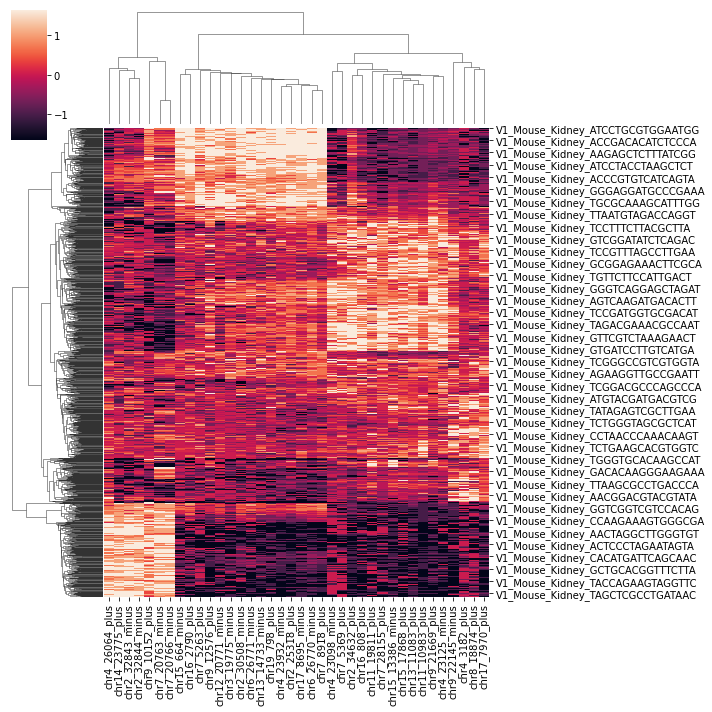

In [109]:
sns.clustermap(fulldf)
plt.show()

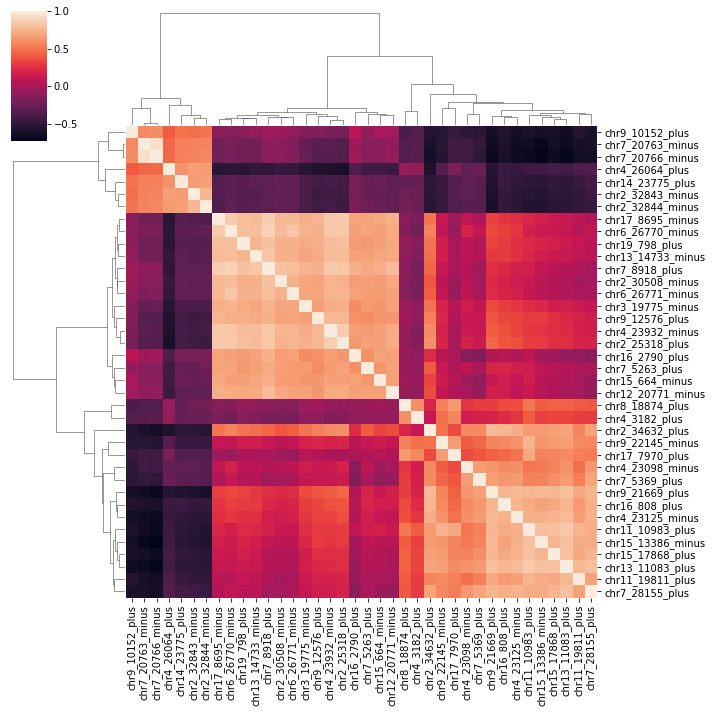

In [110]:
g = sns.clustermap(fulldf.corr())
plt.show()

In [111]:
g.ax_heatmap.get_xticklabels()

[Text(0.5, 0, 'chr9_10152_plus'),
 Text(1.5, 0, 'chr7_20763_minus'),
 Text(2.5, 0, 'chr7_20766_minus'),
 Text(3.5, 0, 'chr4_26064_plus'),
 Text(4.5, 0, 'chr14_23775_plus'),
 Text(5.5, 0, 'chr2_32843_minus'),
 Text(6.5, 0, 'chr2_32844_minus'),
 Text(7.5, 0, 'chr17_8695_minus'),
 Text(8.5, 0, 'chr6_26770_minus'),
 Text(9.5, 0, 'chr19_798_plus'),
 Text(10.5, 0, 'chr13_14733_minus'),
 Text(11.5, 0, 'chr7_8918_plus'),
 Text(12.5, 0, 'chr2_30508_minus'),
 Text(13.5, 0, 'chr6_26771_minus'),
 Text(14.5, 0, 'chr3_19775_minus'),
 Text(15.5, 0, 'chr9_12576_plus'),
 Text(16.5, 0, 'chr4_23932_minus'),
 Text(17.5, 0, 'chr2_25318_plus'),
 Text(18.5, 0, 'chr16_2790_plus'),
 Text(19.5, 0, 'chr7_5263_plus'),
 Text(20.5, 0, 'chr15_664_minus'),
 Text(21.5, 0, 'chr12_20771_minus'),
 Text(22.5, 0, 'chr8_18874_plus'),
 Text(23.5, 0, 'chr4_3182_plus'),
 Text(24.5, 0, 'chr2_34632_plus'),
 Text(25.5, 0, 'chr9_22145_minus'),
 Text(26.5, 0, 'chr17_7970_plus'),
 Text(27.5, 0, 'chr4_23098_minus'),
 Text(28.5, 0, 'c

/home/groups/horence/applications/anaconda3/envs/jup_env/lib/python3.9/site-packages/seaborn/matrix.py:624: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


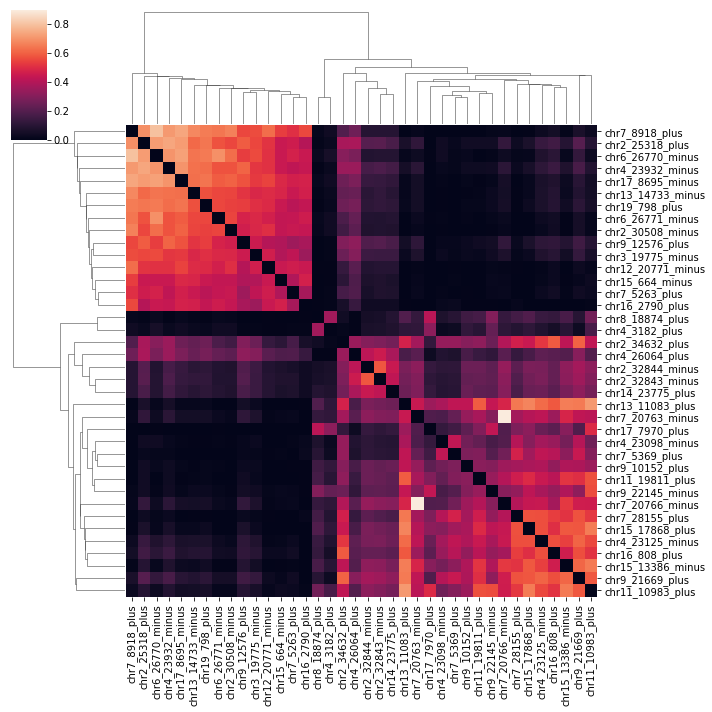

In [112]:
g = sns.clustermap((fulldf.corr()**2).replace(1,0))
plt.show()

In [119]:
[x.get_text() for x in g.ax_heatmap.get_xticklabels()]

['chr7_8918_plus',
 'chr2_25318_plus',
 'chr6_26770_minus',
 'chr4_23932_minus',
 'chr17_8695_minus',
 'chr13_14733_minus',
 'chr19_798_plus',
 'chr6_26771_minus',
 'chr2_30508_minus',
 'chr9_12576_plus',
 'chr3_19775_minus',
 'chr12_20771_minus',
 'chr15_664_minus',
 'chr7_5263_plus',
 'chr16_2790_plus',
 'chr8_18874_plus',
 'chr4_3182_plus',
 'chr2_34632_plus',
 'chr4_26064_plus',
 'chr2_32844_minus',
 'chr2_32843_minus',
 'chr14_23775_plus',
 'chr13_11083_plus',
 'chr7_20763_minus',
 'chr17_7970_plus',
 'chr4_23098_minus',
 'chr7_5369_plus',
 'chr9_10152_plus',
 'chr11_19811_plus',
 'chr9_22145_minus',
 'chr7_20766_minus',
 'chr7_28155_plus',
 'chr15_17868_plus',
 'chr4_23125_minus',
 'chr16_808_plus',
 'chr15_13386_minus',
 'chr9_21669_plus',
 'chr11_10983_plus']